# 02456 Deep Learning – Group 27  
## NumPy FFNN: Main Results Notebook

This notebook reproduces the main experiments from the report:

- Best configuration on **Fashion-MNIST** (train + validation metrics).
- One configuration on **CIFAR-10**.
- Confusion matrix for the best model.

In [1]:
import sys
import pathlib

# Add project root to Python path so we can import src.*
PROJECT_ROOT = pathlib.Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import numpy as np
import matplotlib.pyplot as plt

from src.data_loaders import load_fashion_mnist, load_cifar10
from src.train import train
from src.activations import softmax
from src.utils import train_val_split
from sklearn.metrics import confusion_matrix


In [2]:
def plot_confusion_matrix(cm, class_names, title="Confusion matrix"):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation="nearest")
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(len(class_names)),
        yticks=np.arange(len(class_names)),
        xticklabels=class_names,
        yticklabels=class_names,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.tight_layout()
    plt.show()


In [3]:
# Fashion-MNIST
X_train, y_train, X_val, y_val = load_fashion_mnist(val_ratio=0.2, seed=42)
print("Fashion-MNIST shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)


Download complete.
Download complete.
Download complete.
Download complete.
Fashion-MNIST shapes:
X_train: (48000, 784) y_train: (48000,)
X_val: (12000, 784) y_val: (12000,)


In [4]:
config_fashion_best = {
    "hidden": [256, 128],
    "activations": ["relu", "relu"],
    "optimizer": "adam",
    "lr": 1e-3,
    "batch_size": 128,
    "epochs": 8,          # you can set 10+ in the CLI for final results
    "l2": 1e-4,
    "weight_init": "he",
    "seed": 42,
    "wandb_project": None  # set to your project name if you also want logging here
}

net_fashion = train(X_train, y_train, X_val, y_val, config_fashion_best)


epoch 000 | train_acc=0.859 val_acc=0.854 train_loss=0.400 val_loss=0.411
epoch 001 | train_acc=0.879 val_acc=0.869 train_loss=0.340 val_loss=0.358
epoch 002 | train_acc=0.878 val_acc=0.865 train_loss=0.336 val_loss=0.368
epoch 003 | train_acc=0.896 val_acc=0.878 train_loss=0.284 val_loss=0.328
epoch 004 | train_acc=0.899 val_acc=0.879 train_loss=0.276 val_loss=0.322
epoch 005 | train_acc=0.905 val_acc=0.885 train_loss=0.257 val_loss=0.308
epoch 006 | train_acc=0.902 val_acc=0.882 train_loss=0.263 val_loss=0.318
epoch 007 | train_acc=0.907 val_acc=0.881 train_loss=0.251 val_loss=0.318

Confusion matrix on validation set:
[[ 924    1   13   40    1    2  169    0    4    0]
 [   5 1151    0   18    0    0    5    0    0    0]
 [   8    0  842   16  150    0  195    0    2    0]
 [  22    8    0 1059   40    0   48    0    3    0]
 [   3    0   54   30  918    0  169    0    3    0]
 [   0    0    0    0    0 1198    0   14    2   13]
 [ 110    1   26   31   53    1  992    0    2    0]


In [5]:
# Compute predictions on validation set
logits_val = net_fashion.forward(X_val)
probs_val = softmax(logits_val)
y_pred_val = probs_val.argmax(axis=1)

acc_val = (y_pred_val == y_val).mean()
print(f"Validation accuracy (Fashion-MNIST) = {acc_val:.3f}")

cm_fashion = confusion_matrix(y_val, y_pred_val)
print("Confusion matrix shape:", cm_fashion.shape)


Validation accuracy (Fashion-MNIST) = 0.881
Confusion matrix shape: (10, 10)


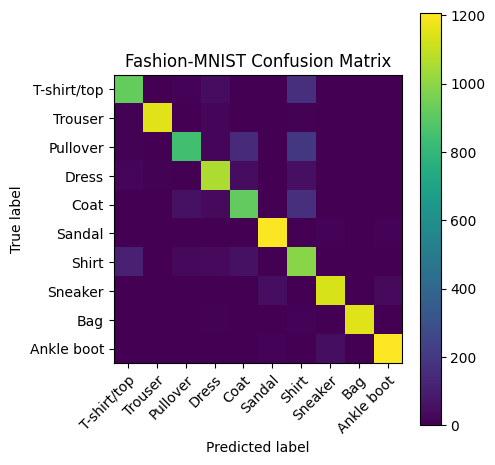

In [6]:
fashion_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plot_confusion_matrix(cm_fashion, fashion_classes, title="Fashion-MNIST Confusion Matrix")


In [7]:
X_train_cifar, y_train_cifar, X_val_cifar, y_val_cifar = load_cifar10(val_ratio=0.2, seed=42)
print("CIFAR-10 shapes:")
print("X_train:", X_train_cifar.shape, "y_train:", y_train_cifar.shape)
print("X_val:", X_val_cifar.shape, "y_val:", y_val_cifar.shape)


Download complete.
Extracting CIFAR-10 archive...
Extraction complete.
CIFAR-10 shapes:
X_train: (40000, 3072) y_train: (40000,)
X_val: (10000, 3072) y_val: (10000,)


In [8]:
config_cifar = {
    "hidden": [512, 256, 128],
    "activations": ["relu", "relu", "relu"],
    "optimizer": "adam",
    "lr": 1e-3,
    "batch_size": 128,
    "epochs": 10,       # you might use 20 in final CLI runs
    "l2": 1e-4,
    "weight_init": "he",
    "seed": 42,
    "wandb_project": None
}

net_cifar = train(X_train_cifar, y_train_cifar, X_val_cifar, y_val_cifar, config_cifar)


epoch 000 | train_acc=0.370 val_acc=0.365 train_loss=1.766 val_loss=1.780
epoch 001 | train_acc=0.406 val_acc=0.395 train_loss=1.679 val_loss=1.712
epoch 002 | train_acc=0.431 val_acc=0.417 train_loss=1.601 val_loss=1.640
epoch 003 | train_acc=0.458 val_acc=0.444 train_loss=1.520 val_loss=1.571
epoch 004 | train_acc=0.443 val_acc=0.424 train_loss=1.553 val_loss=1.616
epoch 005 | train_acc=0.501 val_acc=0.473 train_loss=1.404 val_loss=1.477
epoch 006 | train_acc=0.494 val_acc=0.466 train_loss=1.423 val_loss=1.494
epoch 007 | train_acc=0.506 val_acc=0.476 train_loss=1.397 val_loss=1.497
epoch 008 | train_acc=0.500 val_acc=0.465 train_loss=1.399 val_loss=1.503
epoch 009 | train_acc=0.526 val_acc=0.484 train_loss=1.330 val_loss=1.452

Confusion matrix on validation set:
[[559  44  46  54  14  14  16  21 178  31]
 [ 68 663  12  39  12  20  26  19  90  78]
 [100  36 374 131  81  81 128  47  42   7]
 [ 46  29  61 424  26 159 134  10  40  21]
 [ 73   9 217 102 302  67 129  68  46  11]
 [ 23  2

In [9]:
# CIFAR-10 evaluation
logits_val_cifar = net_cifar.forward(X_val_cifar)
probs_val_cifar = softmax(logits_val_cifar)
y_pred_val_cifar = probs_val_cifar.argmax(axis=1)

acc_val_cifar = (y_pred_val_cifar == y_val_cifar).mean()
print(f"Validation accuracy (CIFAR-10) = {acc_val_cifar:.3f}")

cm_cifar = confusion_matrix(y_val_cifar, y_pred_val_cifar)
print("Confusion matrix shape:", cm_cifar.shape)


Validation accuracy (CIFAR-10) = 0.484
Confusion matrix shape: (10, 10)


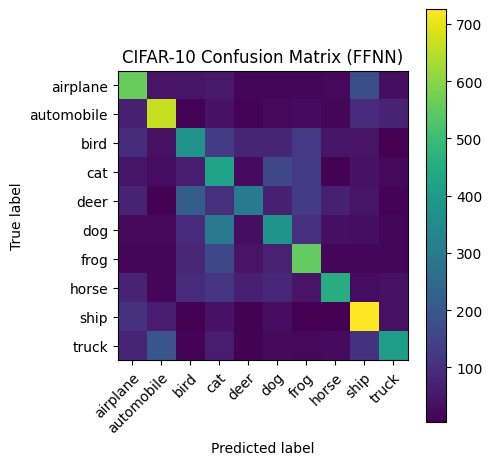

In [10]:
cifar_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plot_confusion_matrix(cm_cifar, cifar_classes, title="CIFAR-10 Confusion Matrix (FFNN)")


### Notes on Reproducing Report Results

In this notebook, we use a slightly smaller number of epochs (e.g. 8–10) 
to keep runtime manageable. The final results reported in the paper were 
obtained by running the same configurations for more epochs via the 
command-line interface:

```bash
python -m src.run_experiment --dataset fashion ...
python -m src.run_experiment --dataset cifar ...
